  0%|          | 0/89 [00:00<?, ?it/s]

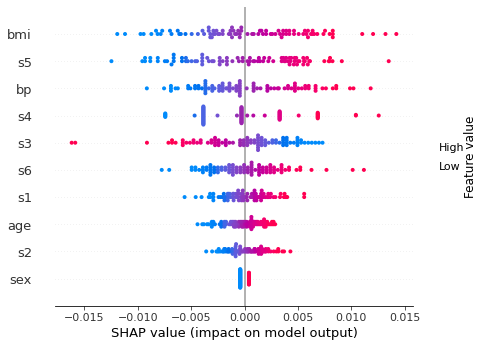

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
#import time
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct

X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_summary = shap.kmeans(X_train, 10)
kernel = DotProduct() + WhiteKernel()

gp = GaussianProcessRegressor(kernel)
gp.fit(X_train, y_train)

explainer = shap.KernelExplainer(gp.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [7]:
X_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
362,0.019913,0.050680,0.104809,0.070073,-0.035968,-0.026679,-0.024993,-0.002592,0.003712,0.040343
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070211,0.007207
271,0.038076,0.050680,0.008883,0.042530,-0.042848,-0.021042,-0.039719,-0.002592,-0.018118,0.007207
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038459,-0.038357
400,-0.023677,-0.044642,0.045529,0.090730,-0.018080,-0.035447,0.070730,-0.039493,-0.034524,-0.009362
...,...,...,...,...,...,...,...,...,...,...
381,-0.070900,0.050680,-0.089197,-0.074528,-0.042848,-0.025739,-0.032356,-0.002592,-0.012908,-0.054925
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022512,0.007207
134,-0.074533,-0.044642,0.043373,-0.033214,0.012191,0.000252,0.063367,-0.039493,-0.027129,-0.046641
49,-0.041840,0.050680,0.014272,-0.005671,-0.012577,0.006202,-0.072854,0.071210,0.035462,-0.013504


In [6]:
shap_values

array([[ 7.83667940e-04,  4.04693266e-04,  1.42065589e-02,
         6.64446328e-03, -1.58148246e-03, -8.74060703e-04,
         2.26341392e-03, -2.91332943e-04,  4.92926043e-04,
         3.45715007e-03],
       [-5.52015025e-04, -4.11630864e-04,  8.25439565e-03,
         5.03221724e-03,  2.15169687e-03,  1.03059404e-03,
         1.59227985e-03,  3.27827931e-03,  9.10088943e-03,
         6.52498591e-04],
       [ 1.52571403e-03,  4.04693265e-04,  1.28600943e-03,
         4.06486962e-03, -1.88748077e-03, -6.82531176e-04,
         3.60568206e-03, -2.91332944e-04, -2.33283534e-03,
         6.52498591e-04],
       [-5.52015025e-04, -4.11630864e-04, -3.06923196e-03,
        -3.67391137e-03, -7.24687207e-04,  1.89992227e-04,
         1.59227985e-03, -2.91332944e-04, -4.96583395e-03,
        -3.20389719e-03],
       [-9.97242680e-04, -4.11630864e-04,  6.22194966e-03,
         8.57915853e-03, -7.85886868e-04, -1.17199552e-03,
        -6.46132902e-03, -3.86094520e-03, -4.45642076e-03,
        -7.